In [1137]:
%matplotlib inline

In [1138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [1139]:
from sklearn.datasets import load_boston

In [1140]:
boston = load_boston()

In [1141]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)

In [1142]:
data["MEDV"] = boston.target

In [1143]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [1144]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [1145]:
data.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
ZN,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


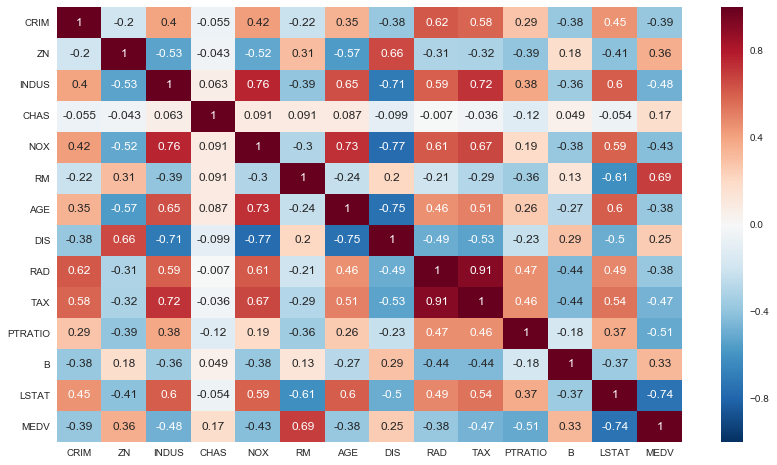

In [1146]:
cor = data.corr().round(3)
plt.figure(figsize=(14,8))
sns.heatmap(cor,annot=True)


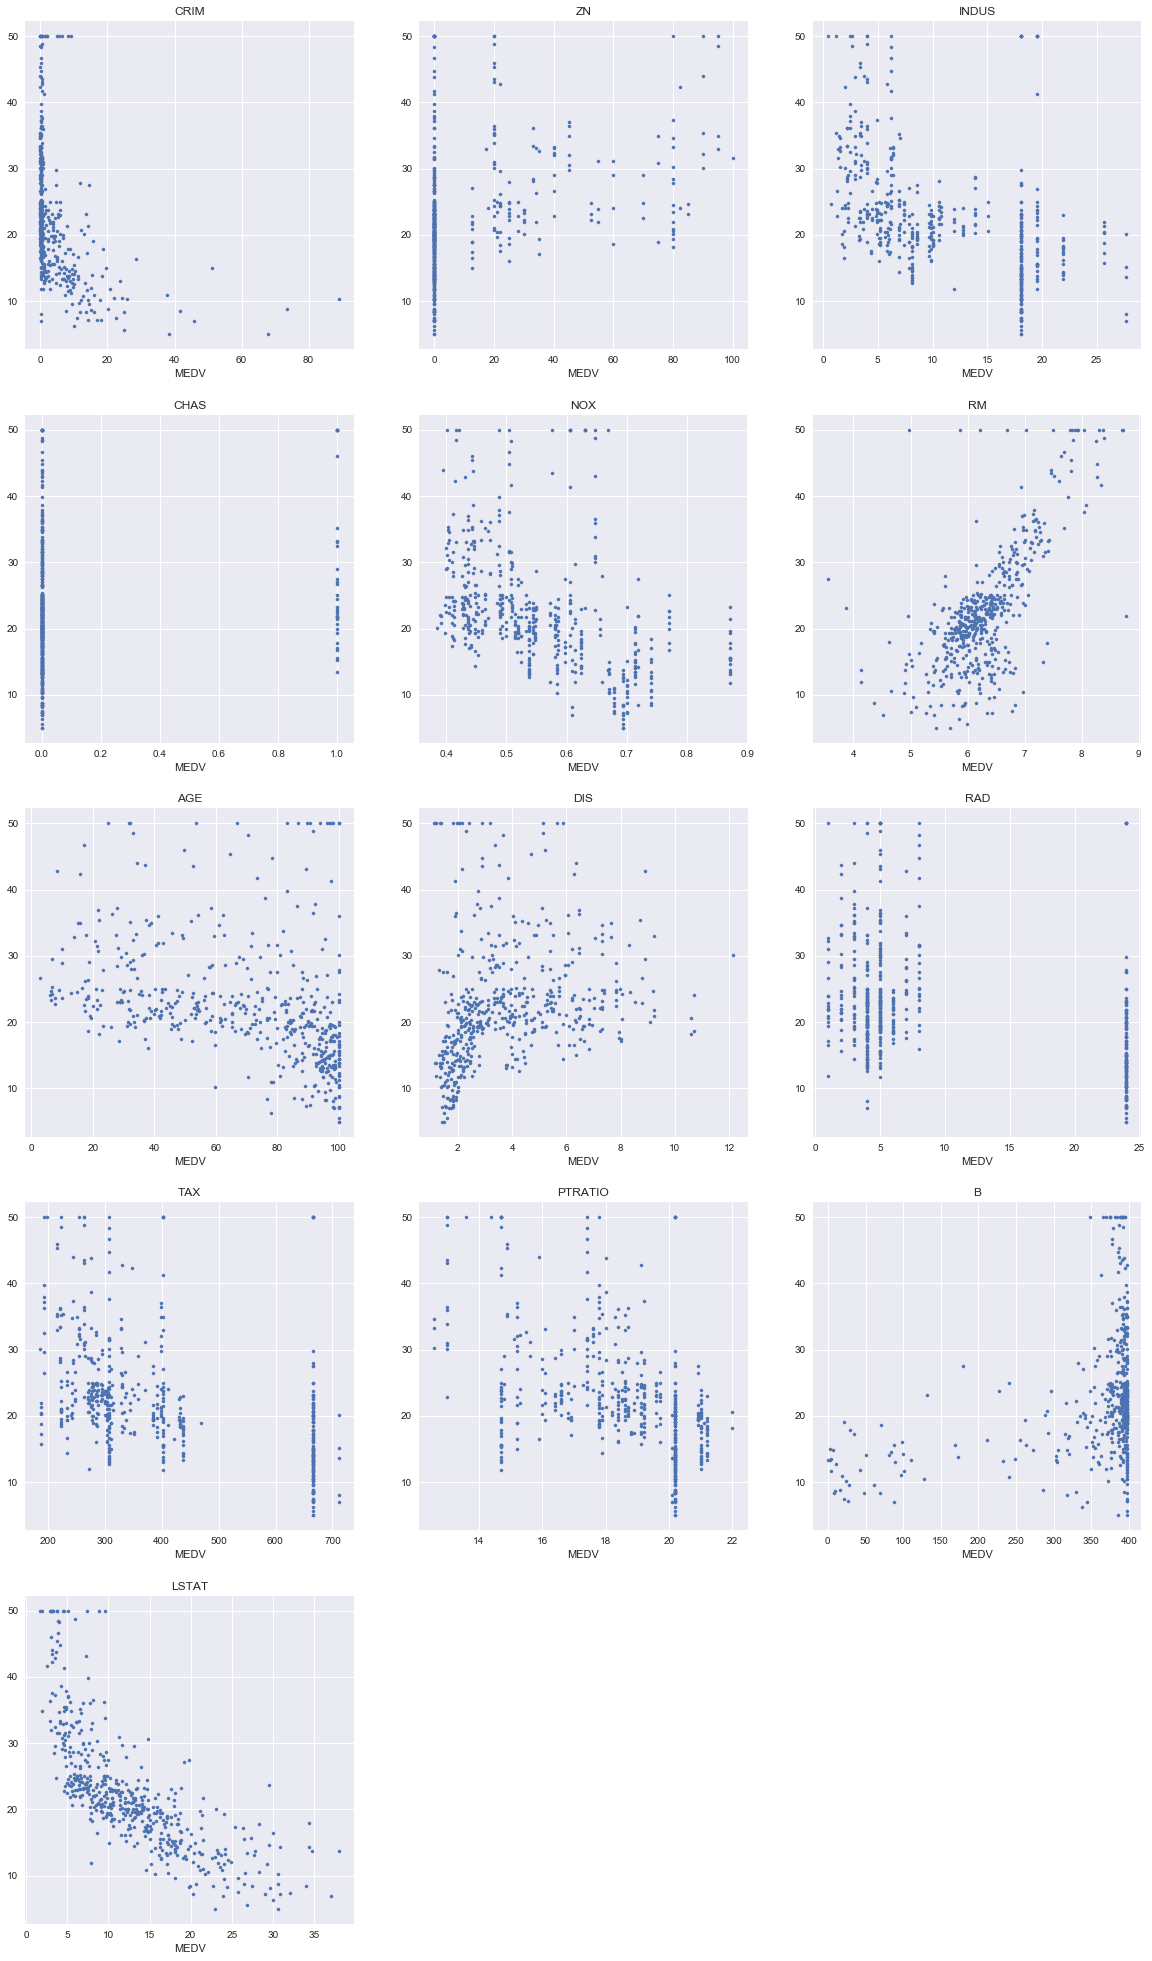

In [1147]:
plt.figure(figsize=(20,35))
for i , j in enumerate(boston.feature_names):
    plt.subplot(5,3,i+1)
    plt.scatter(boston.data[:,i],boston.target,s = 10)
    plt.title(j)
    plt.xlabel('MEDV')

In [1148]:
##看起來只有RM和LSTAT比較好，但還是想說先不要砍太多 所以先砍一些看起來相關性很低很低的數據

In [1149]:
data.drop("AGE", axis=1, inplace=True)
data.drop("DIS", axis=1, inplace=True)
data.drop("RAD", axis=1, inplace=True)
data.drop("TAX", axis=1, inplace=True)
data.drop("B",axis=1, inplace=True)
data.drop("CRIM",axis=1, inplace=True)
data.drop("ZN",axis=1, inplace=True)

In [1150]:
X = data.loc[:,"INDUS":"LSTAT"].values
Y = data["MEDV"]

In [1151]:
X.shape

(506, 6)

In [1152]:
model = LinearRegression()

In [1153]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [1154]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1155]:
y_predict = model.predict(x_test)

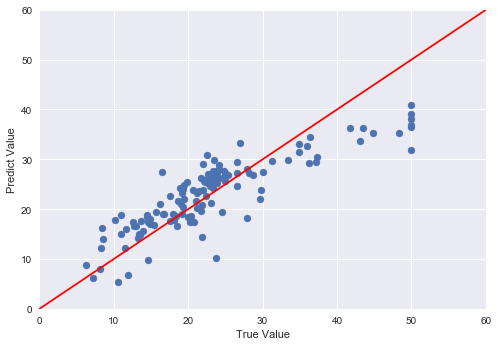

In [1156]:
plt.scatter(y_test,y_predict)
plt.xlim(0,60)
plt.ylim(0,60)
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.plot([0,60],[0,60],'r')

In [1157]:
y_error = y_predict - y_test

In [1158]:
y_error.std()

5.255465944740861

In [1159]:
##將數據標準化看看
boston = load_boston()
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data["MEDV"] = boston.target


In [1160]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [1161]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
data[feature_names] = scaler.fit_transform(data[feature_names])
data.head().round(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.41771,0.28483,-1.28791,-0.2726,-0.14422,0.41367,-0.12001,0.14021,-0.98284,-0.66661,-1.45900,0.44105,-1.07556,24.0
1,-0.41527,-0.48772,-0.59338,-0.2726,-0.74026,0.19427,0.36717,0.55716,-0.86788,-0.98733,-0.30309,0.44105,-0.49244,21.6
2,-0.41527,-0.48772,-0.59338,-0.2726,-0.74026,1.28271,-0.26581,0.55716,-0.86788,-0.98733,-0.30309,0.39643,-1.20873,34.7
3,-0.41468,-0.48772,-1.30688,-0.2726,-0.83528,1.01630,-0.80989,1.07774,-0.75292,-1.10612,0.11303,0.41616,-1.36152,33.4
4,-0.41041,-0.48772,-1.30688,-0.2726,-0.83528,1.22858,-0.51118,1.07774,-0.75292,-1.10612,0.11303,0.44105,-1.02650,36.2


In [1162]:
data.corr().round(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.199,0.404,-0.055,0.418,-0.220,0.351,-0.378,0.622,0.580,0.288,-0.377,0.452,-0.386
ZN,-0.199,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.404,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.055,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.418,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.220,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.351,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.378,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.622,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.580,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


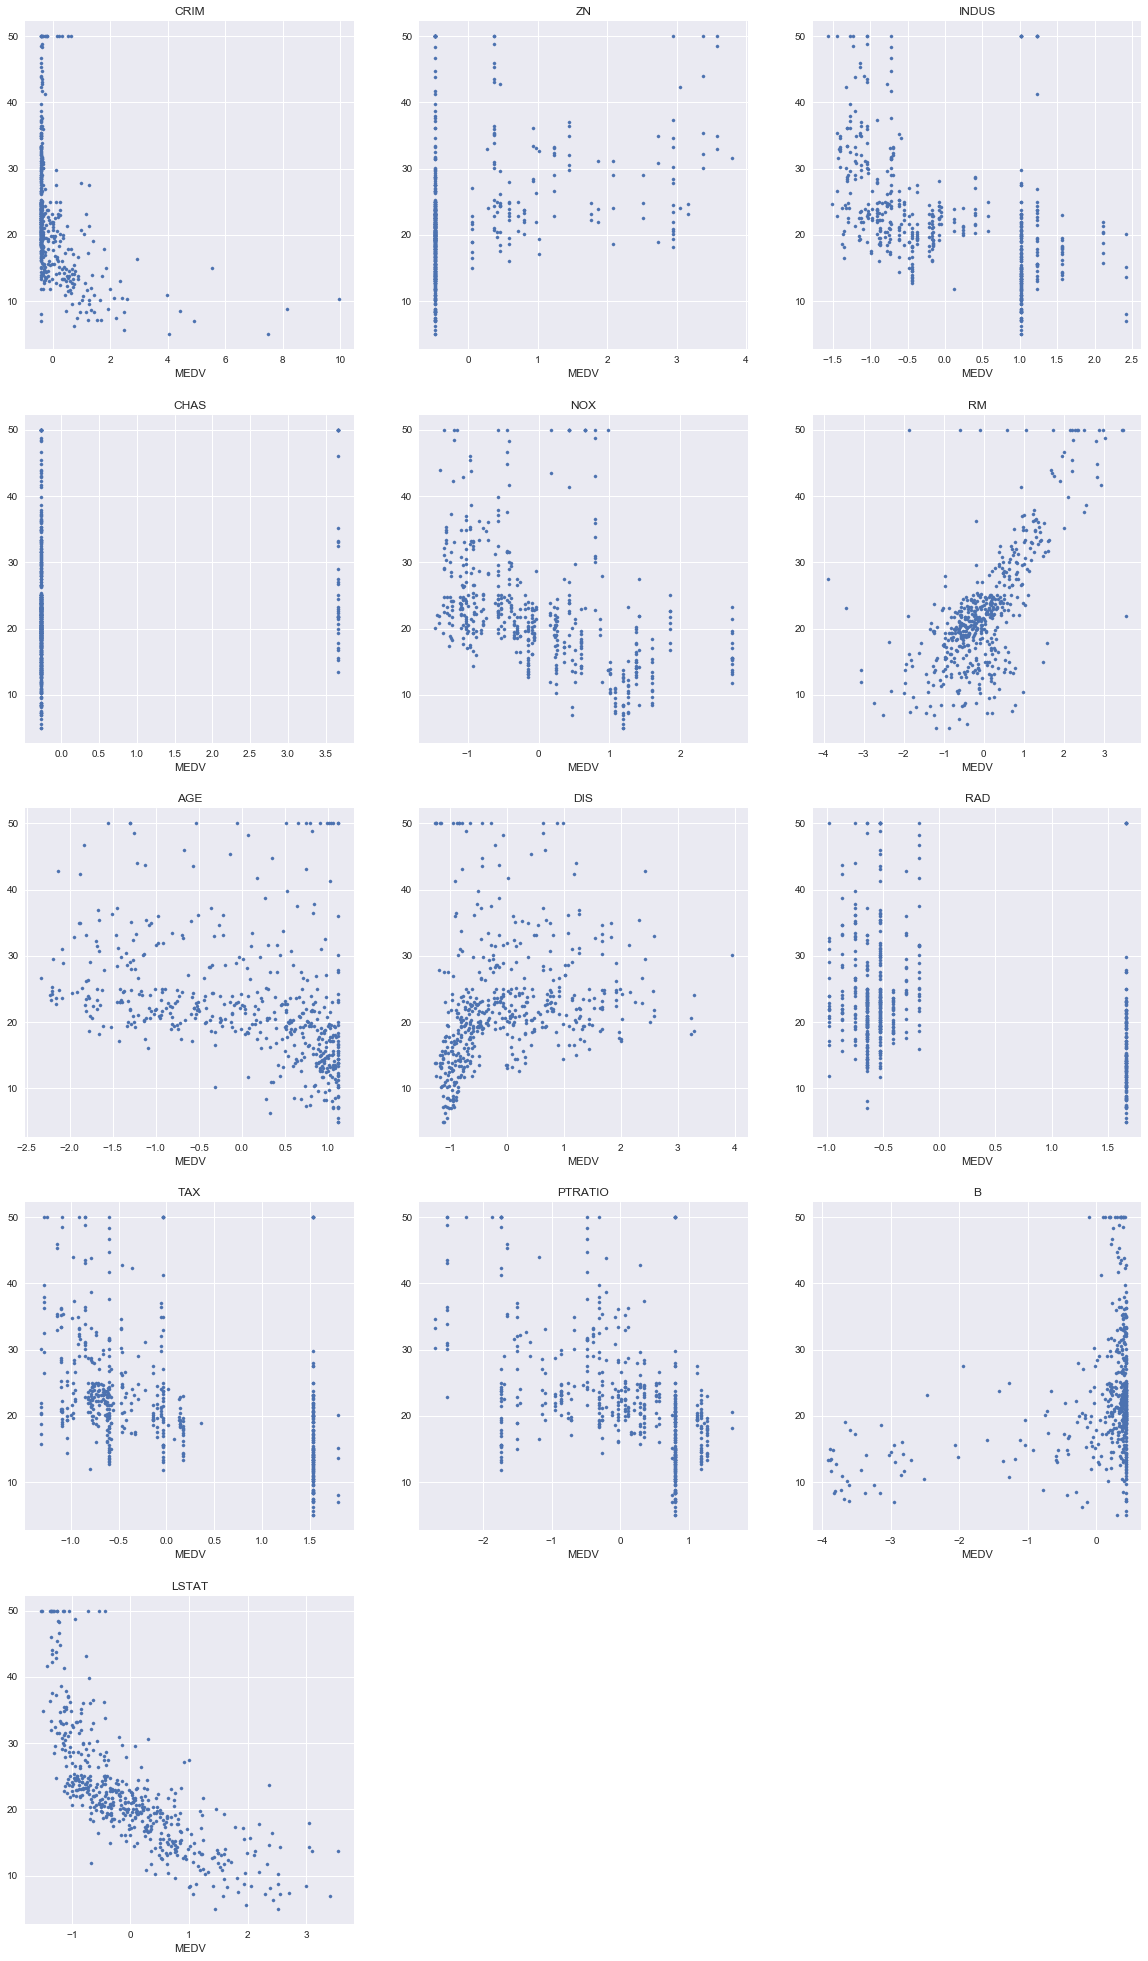

In [1163]:
arraydata = np.array(data)
arraymedv = np.array(data.MEDV)
plt.figure(figsize=(20,35))
for i , j in enumerate(boston.feature_names):
    plt.subplot(5,3,i+1)
    plt.scatter(arraydata[:,i],boston.target,s = 10)
    plt.title(j)
    plt.xlabel('MEDV')


In [1164]:
##### 和未標準化的數據的圖一模一樣，因為標準化其實就只是對整筆資料裡的數據做了平移和伸縮
data.drop(["CRIM","ZN","CHAS","AGE","DIS","RAD","B"], axis = 1, inplace = True)


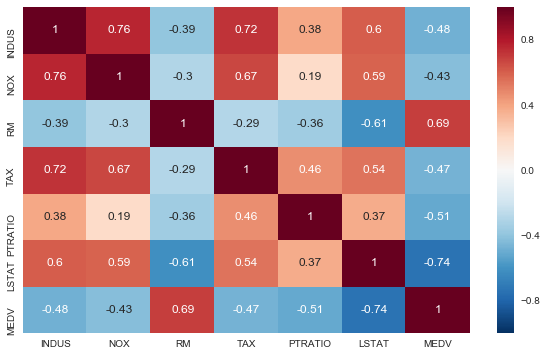

In [1165]:
cor = data.corr().round(3)
plt.figure(figsize=(10,6))
sns.heatmap(cor,annot=True)

In [1166]:
X = data.loc[:,"INDUS":"LSTAT"].values
Y = data["MEDV"]

In [1167]:
X.shape

(506, 6)

In [1168]:
model = LinearRegression()

In [1169]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=1)

In [1170]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1171]:
y_predict = model.predict(x_test)

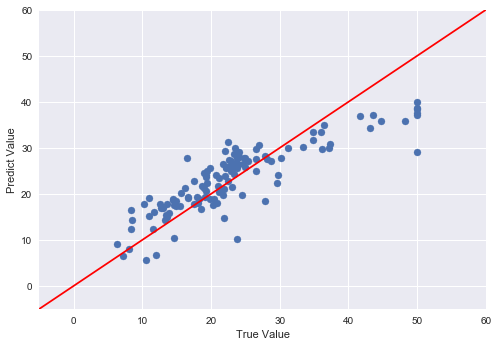

In [1172]:
plt.scatter(y_test,y_predict)
plt.xlim(-5,60)
plt.ylim(-5,60)
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.plot([-10,60],[-10,60],'r')

In [1173]:
y_error = y_predict - y_test

In [1174]:
y_error.std()

5.313872523791808

In [1175]:
##結果對feature的資料做Standardize後再訓練後得到的預測結果與正確值得標準差居然稍微變大XDDD
##error的標準差變大應該是兩次隨積分配到的y_test的數據不同而造成的
##推論是資料有沒有標準化對於LinearRegression的Model沒有什麼太大的影響！

In [1176]:
##接著做和MEDV相關性最高的兩個Feature：RM,LSTAT的分析

In [1177]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)

In [1178]:
data["MEDV"] = boston.target

In [1179]:
data.drop(["INDUS","ZN","NOX","TAX","PTRATIO","CRIM","CHAS","AGE","DIS","RAD","B"], axis = 1, inplace = True)
data.head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [1180]:
X = data.loc[:,"RM":"LSTAT"].values
Y = data["MEDV"]

In [1181]:
model = LinearRegression()

In [1182]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=3)

In [1183]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1184]:
y_predict = model.predict(x_test)

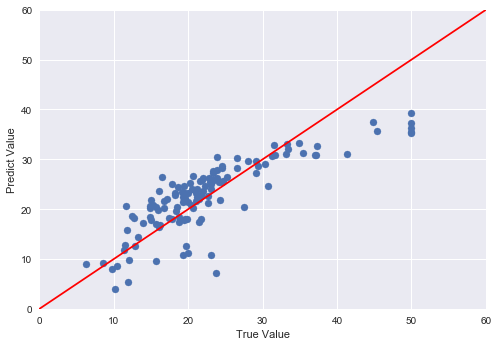

In [1185]:
plt.scatter(y_test,y_predict)
plt.xlim(0,60)
plt.ylim(0,60)
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.plot([0,60],[0,60],'r')

In [1186]:
y_error = y_predict - y_test

In [1187]:
y_error.std()  ##標準差真的有比較小

5.145429931638468

In [1188]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data["MEDV"] = boston.target
data.drop(["INDUS","ZN","NOX","TAX","PTRATIO","CRIM","CHAS","AGE","DIS","RAD","B"], axis = 1, inplace = True)
X = data.loc[:,"RM":"LSTAT"].values
Y = data["MEDV"]
model = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=3)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1189]:
y_predict = model.predict(x_test)

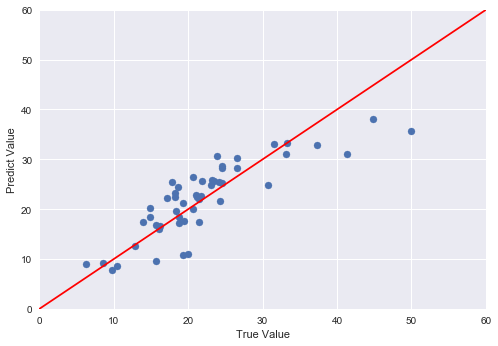

In [1190]:
plt.scatter(y_test,y_predict)
plt.xlim(0,60)
plt.ylim(0,60)
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.plot([0,60],[0,60],'r')

In [1191]:
y_error = y_predict - y_test
y_error.std()   ##把測試資料的size降低後，標準差也降低，但這只是純粹因為選取到的測試資料剛好比較好吧，哈哈

4.546260182712794